[[0.14103399]
 [0.61052205]
 [0.94862249]
 ...
 [0.6548309 ]
 [0.95709969]
 [0.84436717]] [[ 8.86644883]
 [13.37023357]
 [20.34226576]
 ...
 [13.67181451]
 [19.82424221]
 [16.55869953]]


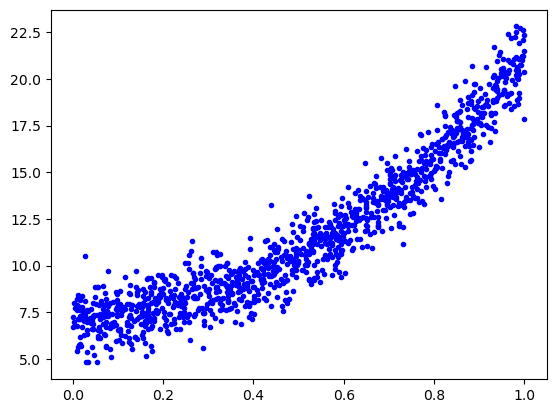

In [ ]:
#1(a) Generate a dataset by sampling 1,200 values from a cubic function with noise
#     added. Set values to range from 0 to 1. (Code)
#creating the dataset please fill in the details
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sea
from sklearn.metrics import mean_squared_error


numSamples = 1200
X = numpy.random.rand(numSamples, 1)
y = 6*X*X*X + 5*X*X + 3*X + 7 + numpy.random.randn(numSamples, 1)
print(X,y)
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(X, y, "b.")
plt.show()

In [23]:
#2(b) Create a 70/30 train/test split of the dataset. (Code)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
print("Number samples in training set: ", len(X_train))
print("Number samples in testing set: ", len(X_test))

Number samples in training set:  840
Number samples in testing set:  360


84     1.964919
168    2.062045
252    2.069579
336    2.068069
420    2.060514
504    2.050646
588    2.043678
672    2.036990
756    2.030923
840    2.028069
dtype: float64
84     7.446621
168    4.933331
252    4.090214
336    3.670778
420    3.419923
504    3.252407
588    3.132521
672    3.041971
756    2.971699
840    2.915411
dtype: float64


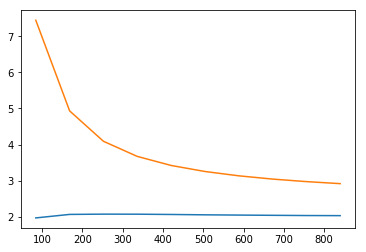

In [24]:
#2(c) Linear regression

# Plot impact of training data
def plot_learning_curves(model, X, y):
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
    train_errors, test_errors = [], []
    samples = [84,168,252,336,420,504,588,672,756,840]
    test_mse =[]
    train_mse=[]
    for x in samples:
        for y in range(1, x):

            model.fit(X_train[:y], y_train[:y])
            y_train_pred = model.predict(X_train[:y])
            y_test_pred = model.predict(X_test)
            train_errors.append(mean_squared_error(y_train_pred, y_train[:y]))
            test_errors.append(mean_squared_error(y_test_pred, y_test))
        mean_train_errors = numpy.mean(train_errors)    
        mean_test_errors = numpy.mean(test_errors)
        train_errors[:] = []
        test_errors[:] = []
        test_mse.append(mean_test_errors)
        train_mse.append(mean_train_errors)
        
        
    print(pd.Series(train_mse,index=samples))
    print(pd.Series(test_mse,index=samples))
    plt.plot(samples, train_mse,label = 'Training error')
    plt.plot(samples, test_mse, label = 'Test error')    
       
       
       
        
        

linear_reg_model = linear_model.LinearRegression()
plot_learning_curves(linear_reg_model, X, y)

In [27]:
#polynomial regression

# Plot impact of training data
def plot_learning_curves(X,y):
    from sklearn.preprocessing import PolynomialFeatures

    poly_features = PolynomialFeatures(degree=4, include_bias = False)
    X_poly = poly_features.fit_transform(X)
    X_polyTrain, X_polyTest, y_polyTrain, y_polyTest = train_test_split(X_poly, y, test_size = 0.3,random_state=42)
    poly_model = linear_model.LinearRegression().fit(X_polyTrain, y_polyTrain)
    model = poly_model
    y_polyPredicted = poly_model.predict(X_polyTest)
    train_errors, test_errors = [], []
    samples = [84,168,252,336,420,504,588,672,756,840]
    test_mse =[]
    train_mse=[]
    for x in samples:
    
        for y in range(1, x):
            model.fit(X_polyTrain[:y], y_polyTrain[:y])
            y_train_predict = model.predict(X_polyTrain[:y])
            y_test_predict = model.predict(X_polyTest)
            train_errors.append(mean_squared_error(y_train_predict, y_polyTrain[:y]))
            test_errors.append(mean_squared_error(y_test_predict, y_polyTest))
        mean_train_errors = numpy.mean(train_errors)    
        mean_test_errors = numpy.mean(test_errors)
        test_mse.append(mean_test_errors)
        train_mse.append(mean_train_errors)
        
 
    print(pd.Series(train_mse,index=samples))
    print(pd.Series(test_mse,index=samples))
    plt.plot(samples, train_mse,label = 'Training error')
    plt.plot(samples, test_mse, label = 'Test error')   


84     0.802286
168    0.832247
252    0.855763
336    0.877052
420    0.893123
504    0.904162
588    0.911471
672    0.916503
756    0.920591
840    0.923927
dtype: float64
84     2.492431
168    2.007762
252    1.755440
336    1.600208
420    1.495221
504    1.419685
588    1.362844
672    1.318645
756    1.283329
840    1.254341
dtype: float64


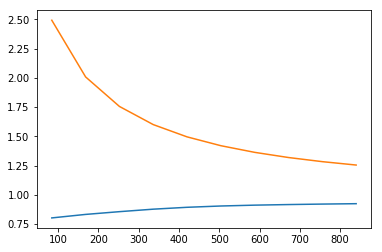

In [28]:
plot_learning_curves(X,y)

In [32]:
#2(a)Load a real dataset not covered in class that is designed for the regression problem;
#    e.g., from sklearn.datasets, Kaggle, your own data, etc. (Code)
import numpy
from sklearn.datasets import load_diabetes
dataset = load_diabetes()

In [33]:
dataset.keys()

dict_keys(['target', 'data', 'feature_names', 'DESCR'])

In [34]:
X=dataset.data
y=dataset.target

In [35]:
# 2(b) Create a 70/30 train/test split of the dataset. (Code)

# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state=42)
print("Number of samples in training set",len(X_train))
print("Number of samples in testing set",len(X_test))

Number of samples in training set 309
Number of samples in testing set 133


2821.738559584376


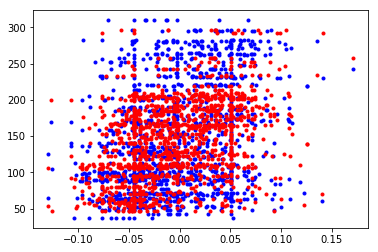

In [36]:
#2(c) Train and evaluate the predictive performance for each of the following regression
#     models: linear, ridge, lasso, and polynomial (to the 4th degree). Evaluate using
#     mean squared error. Report all values in a single table. (Code and Write-up)
#1. Linear Model
from sklearn import linear_model
lr_model=linear_model.LinearRegression().fit(X_train,y_train)
y_pred= lr_model.predict(X_test)
plt.plot(X_test, y_test, "b.")
plt. plot(X_test, y_pred, "r.")

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))


3030.9743277657362


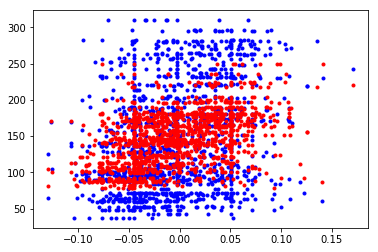

In [41]:
#2. Ridge Model

ridge_model = linear_model.Ridge(alpha = 0.8)
ridge_model.fit(X_train,y_train)
ridge_pred = ridge_model.predict(X_test)
plt.plot(X_test, y_test, "b.")
plt.plot(X_test, ridge_pred, "r.")

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, ridge_pred))

3089.6371118751645

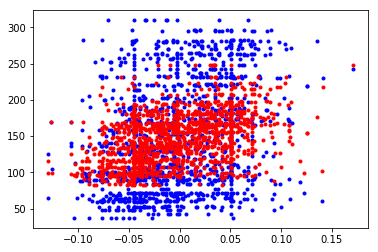

In [40]:
#3. Lasso Model

lasso_model = linear_model.Lasso(alpha = 0.7)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
plt.plot(X_test, y_test, "b.")
plt.plot(X_test, lasso_pred, "r.")

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, lasso_pred)

203103.00528653633


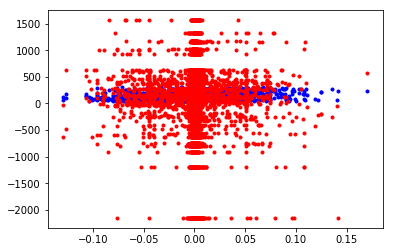

In [15]:
#Polynomial Model

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_polyTrain, X_polyTest, y_polyTrain, y_polyTest =train_test_split(X_poly, y,test_size=0.3,random_state=42)
poly_model = linear_model.LinearRegression().fit(X_polyTrain, y_polyTrain)
y_polyPred = poly_model.predict(X_polyTest)
plt.plot(X_polyTest, y_polyTest, "b.")
plt.plot(X_polyTest, y_polyPred, "r.")

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_polyPred))

In [30]:
# Learned coeffecients for linear model
print(dataset.feature_names,lr_model.coef_)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'] [  29.25034582 -261.70768053  546.29737263  388.40077257 -901.95338706
  506.761149    121.14845948  288.02932495  659.27133846   41.37536901]


2805.393845841174
2813.1519157286784
2837.3163558777396
2870.3051032099015
2908.035326830526
2948.2041735429375
2989.457424397802
3030.9743277657362
3072.2477071208145
3112.961424786802


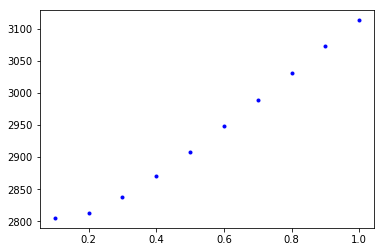

In [44]:
#3(B)
#Ridge Model
alpha_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for i in alpha_values:
    ridge_model = linear_model.Ridge(alpha = i)
    ridge_model.fit(X_train,y_train)
    ridge_pred = ridge_model.predict(X_test)
    
    from sklearn.metrics import mean_squared_error
    print(mean_squared_error(y_test, ridge_pred))
    mse_ridge = mean_squared_error(y_test, ridge_pred)
    plt.plot(i,mse_ridge,"b.")

2775.1600440020425
2806.1046829474594
2845.650183691481
2889.192438523361
2936.3282171871033
3003.147080461654
3089.6371118751645
3195.7989372117427
3316.3449484859043
3444.667115975281


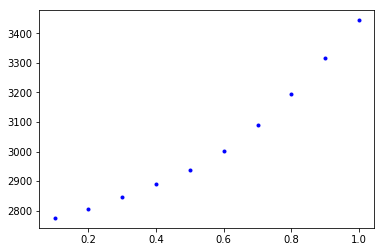

In [46]:
#Lasso Model
alpha_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for i in alpha_values:
    lasso_model = linear_model.Lasso(alpha = i)
    lasso_model.fit(X_train, y_train)
    lasso_pred = lasso_model.predict(X_test)
    
    from sklearn.metrics import mean_squared_error
    print(mean_squared_error(y_test, lasso_pred))
    mse_lasso = mean_squared_error(y_test, lasso_pred)
    plt.plot(i,mse_lasso,"b.")

In [29]:
print(dataset.target)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 